<a href="https://colab.research.google.com/github/kaziizharul/KAZI_IZHARUL_ISLAM/blob/main/ML_LAB_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


 Kernel: LINEAR
Accuracy: 0.7111111111111111
Confusion Matrix:
 [[15  0  0]
 [ 0  9  6]
 [ 1  6  8]]
Classification Report:
               precision    recall  f1-score   support

      setosa       0.94      1.00      0.97        15
  versicolor       0.60      0.60      0.60        15
   virginica       0.57      0.53      0.55        15

    accuracy                           0.71        45
   macro avg       0.70      0.71      0.71        45
weighted avg       0.70      0.71      0.71        45



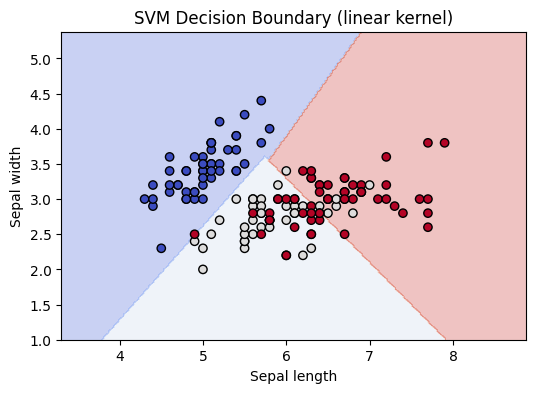


 Kernel: POLY
Accuracy: 0.6888888888888889
Confusion Matrix:
 [[15  0  0]
 [ 0  9  6]
 [ 0  8  7]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.53      0.60      0.56        15
   virginica       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



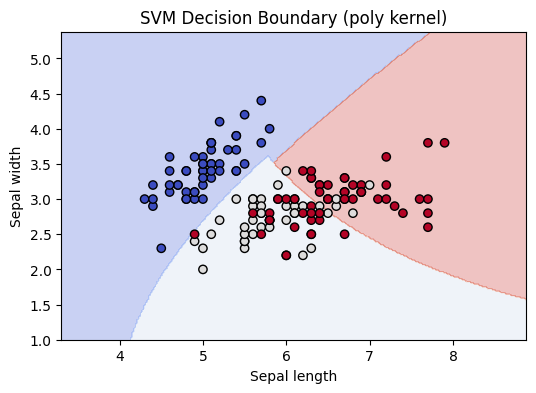


 Kernel: RBF
Accuracy: 0.7111111111111111
Confusion Matrix:
 [[15  0  0]
 [ 0  9  6]
 [ 0  7  8]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.56      0.60      0.58        15
   virginica       0.57      0.53      0.55        15

    accuracy                           0.71        45
   macro avg       0.71      0.71      0.71        45
weighted avg       0.71      0.71      0.71        45



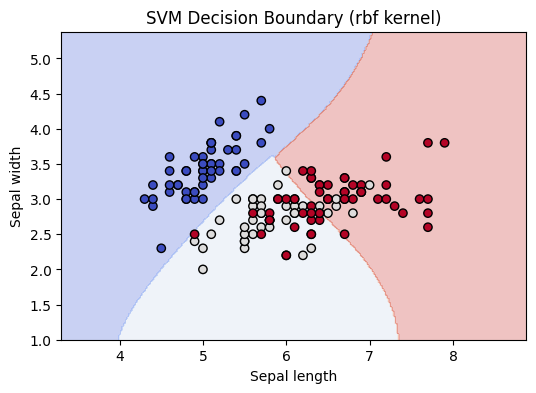


 Kernel: SIGMOID
Accuracy: 0.3333333333333333
Confusion Matrix:
 [[ 0  0 15]
 [ 0  0 15]
 [ 0  0 15]]
Classification Report:
               precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        15
  versicolor       0.00      0.00      0.00        15
   virginica       0.33      1.00      0.50        15

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


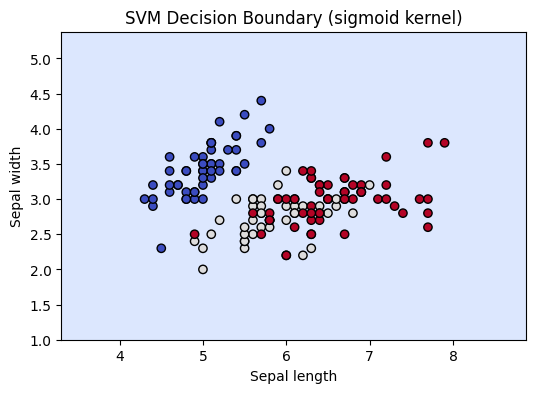

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first 2 features for easy visualization
y = iris.target
target_names = iris.target_names

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Try different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(f"\n Kernel: {kernel.upper()}")

    svm = SVC(kernel=kernel, gamma='auto')
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))

    # Plot decision boundary
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(f"SVM Decision Boundary ({kernel} kernel)")
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()


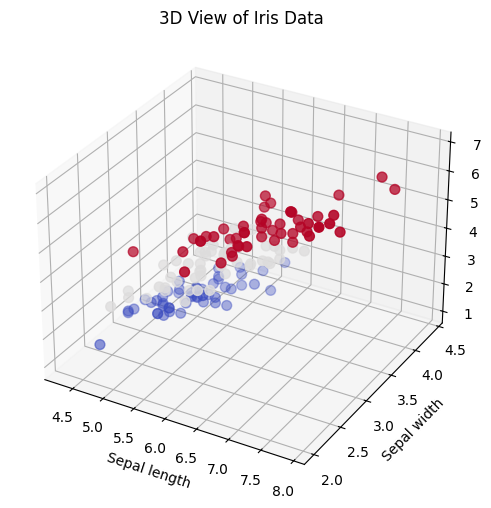

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2],
           c=iris.target, cmap='coolwarm', s=50)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.title('3D View of Iris Data')
plt.show()
